In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pasta_cooked.csv', delimiter=';')
df['ratio'] = df['m1'] / df['m0']
df.head()

,date,type,m0,t,m1,protocol,notes,ratio
0,15.10.25,e,163,13,322,normal,NaN,1.975460
1,17.10.25,s,200,9,445,normal,NaN,2.225000
2,21.10.25,e,168,13,330,normal,NaN,1.964286
3,24.10.25,s,200,9,452,normal,NaN,2.260000
4,26.10.25,s,150,9,328,normal,NaN,2.186667


In [25]:
pasta_pal= {
    'spaghetti': "#d28ff9",
    'elicoidali': "#78c7ee",
    'mafalde': "#faab34",
    'fusilli': "#7ff9ae",
    'farfalle': "#f882b9",
}

pasta_pal_light = {
    'spaghetti': '#e4c1f9',
    'elicoidali': '#a9def9',
    'mafalde': "#fcdcbd",
    'fusilli': '#d0f4de',
    'farfalle': '#ff99c8',
}

pasta_pal_protocol = {
    'normal': '#777777',
    'time': '#cc0000'
}

In [58]:
pasta_dict = {
    's': 'spaghetti',
    'e': 'elicoidali',
    'm': 'mafalde'
}

df['pasta'] = df['type'].copy()
df['pasta'] = df['type'].map(pasta_dict)

df.head()

,date,type,m0,t,m1,protocol,notes,ratio,pasta
0,15.10.25,e,163,13,322,normal,NaN,1.975460,elicoidali
1,17.10.25,s,200,9,445,normal,NaN,2.225000,spaghetti
2,21.10.25,e,168,13,330,normal,NaN,1.964286,elicoidali
3,24.10.25,s,200,9,452,normal,NaN,2.260000,spaghetti
4,26.10.25,s,150,9,328,normal,NaN,2.186667,spaghetti


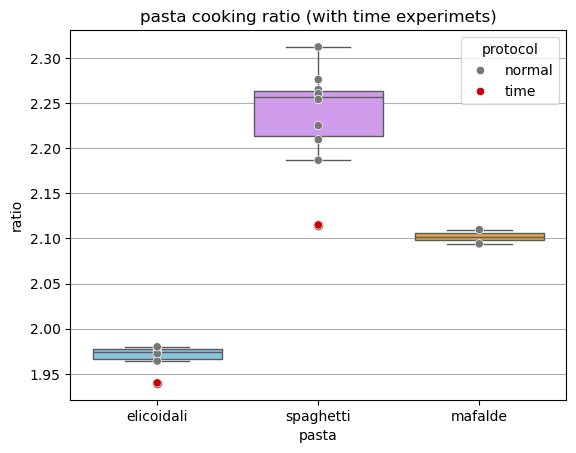

In [59]:
sns.boxplot(
    data = df,
    x = 'pasta',
    hue = 'pasta',
    y = 'ratio',
    palette=pasta_pal
)

sns.scatterplot(
    data = df,
    x = 'pasta',
    hue = 'protocol',
    #marker = 'x',
    y = 'ratio',

    palette=pasta_pal_protocol,
    zorder=4
)

#plt.ylim(0,2.5)

plt.grid(axis='y')
plt.title('pasta cooking ratio (with time experimets)');
plt.savefig('plots/ratios_with-time.png', dpi= 200)

the elicoidali outlier is the time measurement

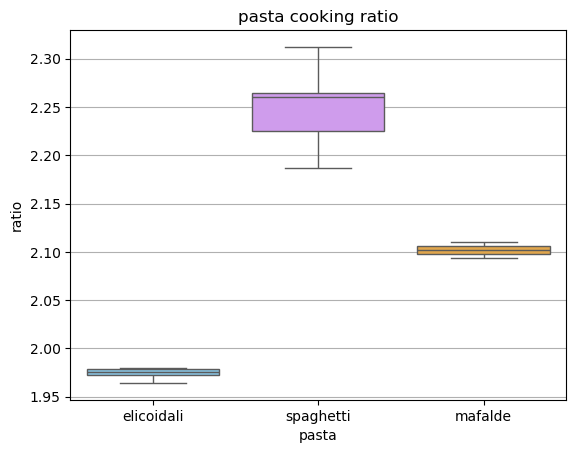

In [60]:
sns.boxplot(
    data = df.loc[df['protocol'] == 'normal'],
    x = 'pasta',
    hue = 'pasta',
    y = 'ratio',
    palette=pasta_pal
)

#plt.ylim(0,2.5)

plt.grid(axis='y')
plt.title('pasta cooking ratio');
plt.savefig('plots/ratios.png', dpi= 200)

In [61]:
ratio_df = (
    df.loc[df['protocol'] == 'normal']
    .groupby('type')['ratio']
    .mean()
)

ratio_df

type
e    1.974169
m    2.101908
s    2.249871
Name: ratio, dtype: float64

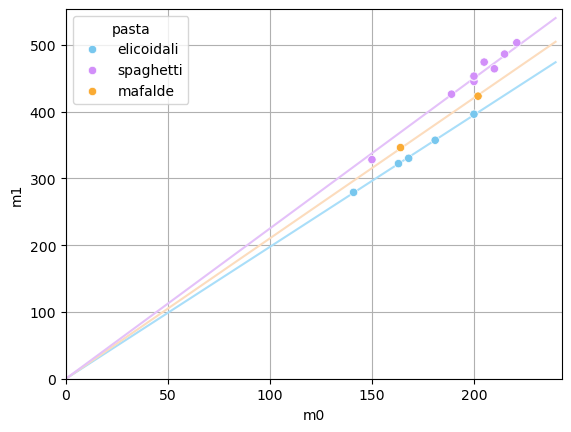

In [62]:
sns.scatterplot(
    data= df.loc[df['protocol'] == 'normal'],
    x='m0',
    y='m1',
    hue='pasta',
    zorder=3,
    palette=pasta_pal
)

plt.xlim(0,df['m0'].max()*1.1)
plt.ylim(0,df['m1'].max()*1.1)

plt.grid(zorder=1)


x = np.linspace(0,240)

for t, r in ratio_df.items():
    plt.plot(x, r*x, color=pasta_pal_light[pasta_dict[t]])

plt.savefig('plots/lines.png', dpi= 200)

## time

In [63]:
time_df = pd.read_csv('pasta_time.csv', delimiter=';')
time_df.head()

# adding the starting pasta mass to each row
m0_df = (
    time_df
    .groupby('date')
    .first()
    .rename(columns={'p': 'm0'})
    .reset_index()
)
time_df = time_df.merge(m0_df[['date', 'm0']], on='date', how='left')

time_df['ratio'] = time_df['p'] / time_df['m0']
time_df['increase'] = time_df['ratio'] - 1
time_df.head()

,date,type,t,p+b,b,p,m0,ratio,increase
0,29.11.25,e,0,246,96,150,150,1.000000,0.000000
1,29.11.25,e,1,293,96,197,150,1.313333,0.313333
2,29.11.25,e,3,317,96,221,150,1.473333,0.473333
3,29.11.25,e,5,337,96,241,150,1.606667,0.606667
4,29.11.25,e,7,355,96,259,150,1.726667,0.726667


In [64]:
time_df['pasta'] = time_df['type'].map(pasta_dict)

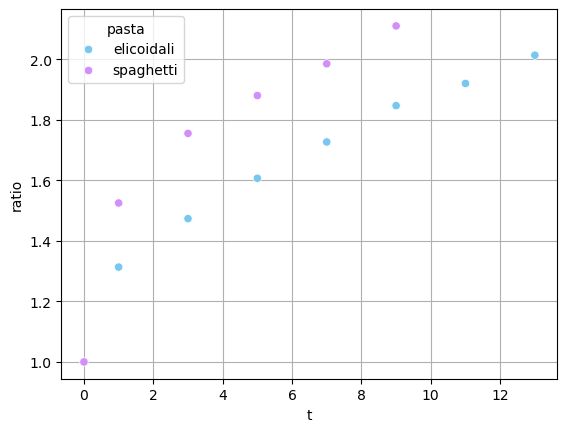

In [68]:
sns.scatterplot(
    data=time_df,
    x='t',
    y='ratio',
    hue='pasta',
    zorder=3,
    palette=pasta_pal
)

plt.grid(zorder=1)
plt.savefig('plots/time.png', dpi= 200)

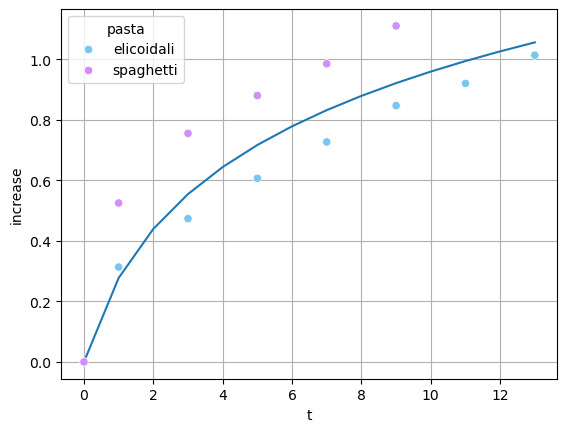

In [66]:
sns.scatterplot(
    data=time_df,
    x='t',
    y='increase',
    hue='pasta',
    zorder=3,
    palette=pasta_pal
)

x = np.arange(0,14,1)
f_t = lambda t: np.log(x+1) * 0.4
plt.plot(f_t(x))

plt.grid(zorder=1)

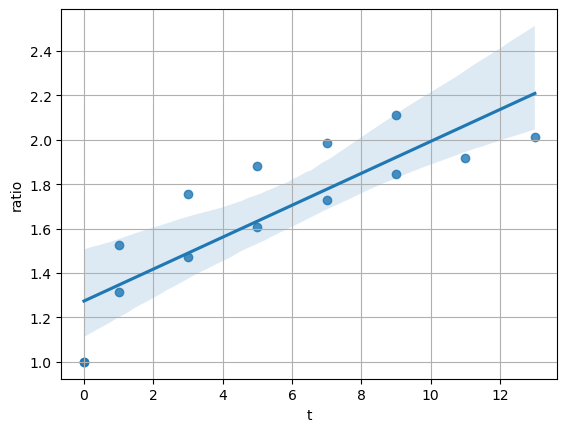

In [67]:
sns.regplot(
    data=time_df,
    x='t',
    y='ratio',
)



plt.grid(zorder=1)


## morphology simulation

In [2]:
import cv2 as cv
from scipy.ndimage import distance_transform_edt, distance_transform_bf

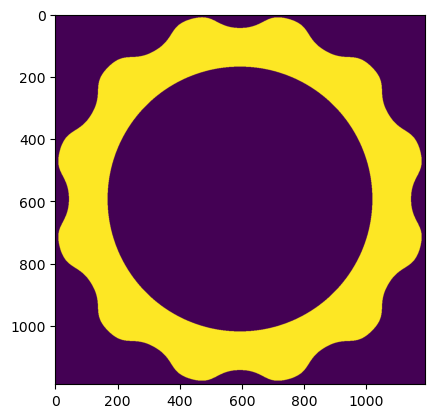

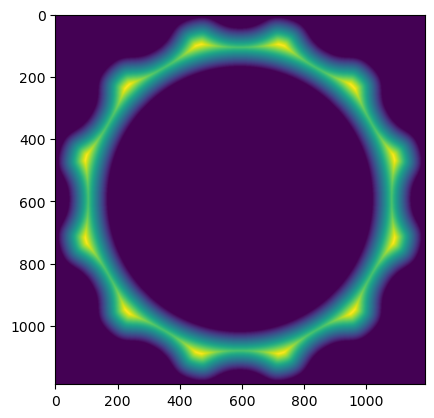

In [3]:
section_e = cv.imread('morphology/e_2d.png', cv.IMREAD_GRAYSCALE) == 0
section_e = np.pad(section_e, 10, constant_values=False)

plt.imshow(section_e)
plt.show()

dist_e = distance_transform_edt(section_e)

plt.imshow(dist_e)

In [28]:
def cum_dist(dist, bins=20):
    counts, edges = np.histogram(dist, bins=bins)

    centers = 0.5 * (edges[:-1] + edges[1:])

    counts = counts[1:]
    dist = centers[1:]

    cum_perc = np.cumsum(counts) / np.sum(counts)
    plt.plot(dist, cum_perc)
    plt.show()

    return cum_perc, dist

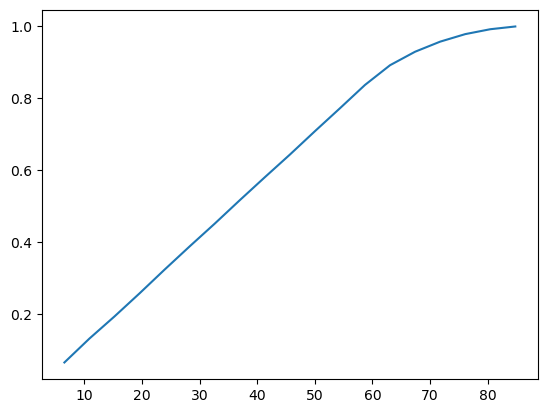

In [29]:
cum_perc_e, bins_e = cum_dist(dist_e)

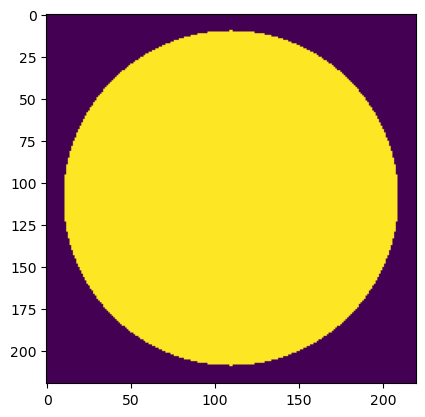

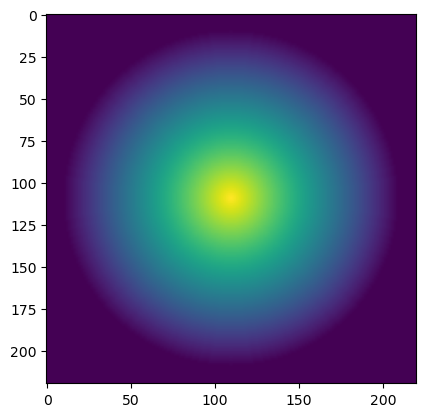

In [30]:
section_s = cv.imread('morphology/s_2d.png', cv.IMREAD_GRAYSCALE) == 0
section_s = np.pad(section_s, 10, constant_values=False)

plt.imshow(section_s)
plt.show()

dist_s = distance_transform_edt(section_s)

plt.imshow(dist_s)

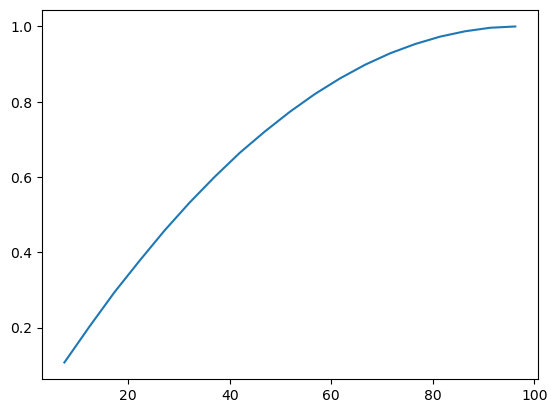

In [31]:
cum_perc_s, bins_s = cum_dist(dist_s)

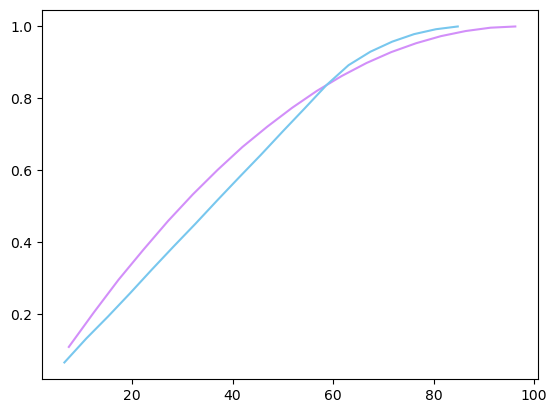

In [32]:
plt.plot(bins_s, cum_perc_s, color=pasta_pal['spaghetti'])
plt.plot(bins_e, cum_perc_e, color=pasta_pal['elicoidali'])